<a href="https://colab.research.google.com/github/Bertoncini/AluraQuarentenaDados/blob/master/02_Desafio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 1

Rotacionar os thicks (os nomes dos generos) do gráfico de barras, de forma a deixar as legendas mais legíveis.

In [0]:
import pandas as pd
filmes = pd.read_csv('https://raw.githubusercontent.com/Bertoncini/AluraQuarentenaDados/master/DataSet/MovieLens/movies.csv')
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/Bertoncini/AluraQuarentenaDados/master/DataSet/MovieLens/ratings.csv')

In [0]:
filmes.columns = ['filmeId','titulo','generos']
avaliacoes.columns = ['usuarioId','filmeId','nota','momento']

In [0]:
avaliacoes_media_filme = avaliacoes.groupby('filmeId')['nota'].mean().round(2)

In [0]:
filmes_media = filmes.join(avaliacoes_media_filme,"filmeId").rename(columns={'nota':'notaMedia'})

In [0]:
total_avaliacao_filme = avaliacoes.groupby('filmeId')['nota'].count()

In [50]:
filmes_media_total = filmes_media.join(total_avaliacao_filme,'filmeId').rename(columns={'nota':'qtdNota'})

,filmeId,titulo,generos,notaMedia,qtdNota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


In [0]:
generos = filmes_media_total['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

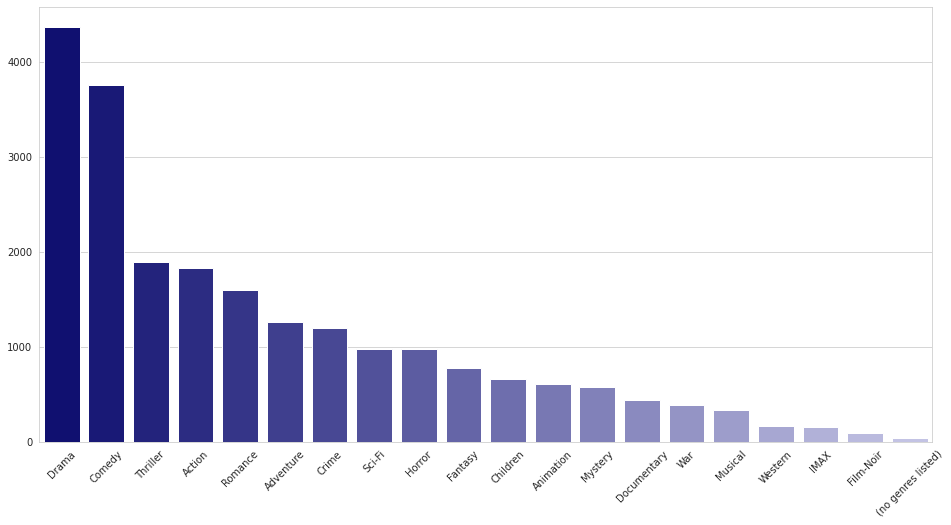

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(16,8))
sns.barplot(x=generos.index,
            y=generos.values,
            palette=sns.light_palette("navy", reverse=True, n_colors=len(generos) + 4))

plt.xticks(rotation=45)

plt.show()